In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('news.csv')

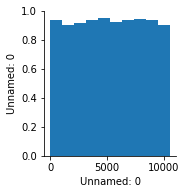

In [49]:
sns.pairplot(df)

In [50]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [51]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [53]:
df.shape

(6335, 4)

In [54]:
X = df.text

In [55]:
X

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [56]:
y = df.label

In [57]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.8)

In [63]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [64]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [65]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [66]:
PAC = PassiveAggressiveClassifier(C = 0.5, random_state = 5)

In [67]:
PAC.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=0.5, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=5, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [68]:
PAC.score(tfidf_test, y_test)

0.925808997632202

In [69]:
y_pred = PAC.predict(tfidf_test)

In [70]:
pac_acc = accuracy_score(y_test, y_pred)

In [71]:
pac_acc

0.925808997632202

In [72]:
conf_mat = confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

In [73]:
conf_mat

array([[587,  51],
       [ 43, 586]])

In [74]:
clf_report = classification_report(y_test, y_pred)

In [75]:
print(clf_report)

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [80]:
data = ["The Nigerian Government has denied compiling a ‘no-fly list’ of persons who participated in the recent #EndSARS protests."]
data = tfidf_vectorizer.transform(data)

In [81]:
prediction = PAC.predict(data)

In [83]:
prediction[0]

'FAKE'